# Action detection

In [2]:
!pip install tensorflow==2.16.1 opencv-python mediapipe scikit-learn matplotlib

You should consider upgrading via the 'C:\Users\User\Desktop\coding life\myenv\Scripts\python.exe -m pip install --upgrade pip' command.



  Using cached tensorflow-2.16.1-cp310-cp310-win_amd64.whl (2.1 kB)
  Using cached opencv_python-4.10.0.82-cp37-abi3-win_amd64.whl (38.8 MB)
  Using cached mediapipe-0.10.14-cp310-cp310-win_amd64.whl (50.8 MB)
     ---------------------------------------- 11.0/11.0 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 8.0/8.0 MB 3.3 MB/s eta 0:00:00
     ------------------------------------ 376.9/376.9 MB 735.5 kB/s eta 0:00:00
     -------------------------------------- 127.8/127.8 KB 1.9 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 KB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 413.4/413.4 KB 3.2 MB/s eta 0:00:

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import sklearn
print("Scikit-learn version:", sklearn.__version__)


In [ ]:
import cv2
import numpy as np # work with arryas
import os  #work with file parth 
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [ ]:
#holistic to download the model
mp_holistic = mp.solutions.holistic#holistic model
#drawing.....-to draw keypoints
mp_drawing = mp.solutions.drawing_utils #drawing utilities

In [ ]:
def mediapipe_detection(image,model):
    #COLOR CONVERSION
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)#to chage or recolor 
    image.flags.writeable = False                #initally writable status false
    results = model.process(image)               #detection using mediapipe-make prediction 
    image.flags.writeable = True                 #if writable status make it writeable
    #COLOR CONVERSION
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image,results #return the images to back to loop
    

In [ ]:
#visualise the frame
def draw_landmarks(image,results):
    #instance mp_drawing.draw_landmarks(image , land mark , connction map)
    mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)#Draw face connection
    mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)#Draw pose connection
    mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)#Draw left hand connction
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)#Draw right hand connection

# mp_drawing.draw_landmarks(
    
#     image: numpy.ndarray,
#     landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
#     connections: Optional[List[Tuple[int, int]]] = None,
#     landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec], NoneType] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
#     connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
#     is_drawing_landmarks: bool = True,
    #landmark_drawing_spec: -format for landmark 
    #connection_drawing_spec-format for connection

##last 2 optional for formatting

In [394]:
def draw_styled_landmarks(image,results):
    #instance mp_drawing.draw_landmarks(image , land mark , connction map)

    #Draw face connection
    mp_drawing.draw_landmarks(
            image,
            results.face_landmarks,
            mp_holistic.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),  # styling dots
            mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)  # styling lines
        )
    #Draw pose connection
    mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),  # styling dots
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)  # styling lines
        )
    #Draw left hand connction
    mp_drawing.draw_landmarks(
            image,
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),  # styling dots
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)  # styling lines
        )
    #Draw right hand connection
    mp_drawing.draw_landmarks(
            image,
            results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),  # styling dots
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)  # styling lines
        )

In [ ]:
mp_holistic.POSE_CONNECTIONS

In [395]:
 #access to web cam using open cv 
cap = cv2.VideoCapture(0)#access webcam   grab video capture to 0-ideally webcam
#Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: #initial confidence and tracking confidence
    #to walk throu in video o-> name of the video instead of real time web cam
    while cap.isOpened():#doble cheaking accessing the webcam
    
        #Read feed
        ret, frame = cap.read() #retun value and frame
    
        #Make detection 
        image,results= mediapipe_detection(frame,holistic)#model = holistic
        print(results)

        #Draw landmarks
        draw_styled_landmarks(image,results)
        #show to screen
        cv2.imshow('OpenCV Feed',image)
    
        #break
        if cv2.waitKey(10) & 0xFF == ord('q'):#wait to press key and current key 'q' break 
            break
    cap.release()#realse web cam 
    cv2.destroyAllWindows()# beak the frame

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [400]:
draw_landmarks(frame,results)

## Extract Keypoint Values

In [20]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [22]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])#add all pose landmarks first then all face so on

In [403]:
result_test = extract_keypoints(results) 

In [406]:
np.save('0', result_test)#save mnumpy array

In [407]:
np.load('0.npy') #load numpy array

array([ 0.29052705,  0.72842336, -0.45807165, ...,  0.        ,
        0.        ,  0.        ])

30 detection points and totaly 30*1662 points

## Setup folder for collection

In [480]:
#parth for exported data , numpy arrays
DATA_PATH = os.path.join('MP_DATA')

#actions try to detect
actions = np.array(['hello', 'thanks','i love you'])
#we use 30 frams * 3 actions * mumber of sequence 

#thirty video worth of data 
no_sequences = 30

#vidoes going to be 30 frame of length 
sequence_length =30

In [481]:
#cearting folders to store the data
for action in actions:
    for sequence in range(no_sequences):
        try:#if already exist there will be erro so pass 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
            #print(":")
        except:
            pass

# # Verifying the folder structure
# for action in actions:
#     for sequence in range(no_sequences):
#         print(os.path.join(DATA_PATH, action, str(sequence)))

## Collect keypoint values for training and Testing 

In [482]:
 #access to web cam using open cv 
cap = cv2.VideoCapture(0)#access webcam   grab video capture to 0-ideally webcam
#Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: #initial confidence and tracking confidence
    #NEW loop
    #Loop through actions 
    for action in actions:#3
        #Loop through sequence aka video
        for sequence in range (no_sequences):#30
            #Loop through video length aka sequence Length 
            for frame_num in range(sequence_length):#each frame 30 frames of keypoint per video
    
                #Read feed
                ret, frame = cap.read() #retun value and frame
            
                #Make detection 
                image,results= mediapipe_detection(frame,holistic)#model = holistic
                print(results)
        
                #Draw landmarks
                draw_styled_landmarks(image,results)

                #NEW apply wait logic
                if frame_num == 0:#frame  0 break (2s)
                    cv2.putText(image,'STARTING COLLECTION',(120,200),
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0),1, cv2.LINE_AA)#font size and color (0,255,0)-green line width,line type
                    cv2.putText(image,'Collecting frames for {} video Number {}'.format(action,sequence),(15,12),#what we colloection for what action and video number/ where locate ((15,12)-top of the block )
                               cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1,cv2.LINE_AA)#font type , size ,color , line size , line type 
                    cv2.waitKey(2000)
                else:#if not frame zero (no break keep gettimng and printing)
                    cv2.putText(image,'Collecting frames for {} video Number {}'.format(action,sequence),(15,12),
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255),1,cv2.LINE_AA)
                
                #NEW export keypoints    #save to folders
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                #show to screen
                cv2.imshow('OpenCV Feed',image)
    
                #break
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()#realse web cam 
    cv2.destroyAllWindows()# beak the frame

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [479]:
cap.release()
cv2.destroyAllWindows()

## preprocess data 

In [483]:
from sklearn.model_selection import train_test_split #partition data into training partition,testing partitions
from tensorflow.keras.utils import to_categorical #convert data into one________ data

In [484]:
label_map = {label:num for num, label in enumerate(actions)} #looping through actions 

In [485]:
sequences, labels = [], []#seq arr-featured data (x)   lab arr- y data 
for action in actions:
    for sequence in range (no_sequences):
        window = []#all the different frames for particular sequence
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [491]:
x = np.array(sequences)

In [492]:
y = to_categorical(labels).astype(int)

In [493]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.05)#test size test partion 5% add data

## Build and Train LSTM Neural Network 

In [495]:
from tensorflow.keras.models import Sequential # buil sequential nurel network 
from tensorflow.keras.layers import LSTM, Dense # LSTM layer temperal component building neurl network allow to access detetdtion, dense-normally fully connected layer
from tensorflow.keras.callbacks import TensorBoard #login inside tensorflow If we want trace and monitor modle as training

In [496]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir = log_dir)

In [497]:
model = Sequential()#inatentiating the model
#add 3sets of lstm layer
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))#pass 64 lstm units    input shape 30 frams per prediction *1662 
#tensorflow within lstm layer need to return sequences cause next layer need those 
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))  # return_sequences=False next layer dense layer so we don't r eturn to that layer
model.add(Dense(64, activation='relu'))#dense layer fully connected layer
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax')) #actions.shape[0], three neural network units  activation='softmax'-retuen the values within prbability of 0 to 1
#probability add up to one

C:\Users\User\Desktop\coding life\myenv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [500]:
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=['categorical_accuracy']) #multiclass classification model - we use this 

In [501]:
model.fit(x_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - categorical_accuracy: 0.3112 - loss: 1.5091
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - categorical_accuracy: 0.3386 - loss: 1.0917
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - categorical_accuracy: 0.3327 - loss: 1.0778
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - categorical_accuracy: 0.4989 - loss: 1.3985
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - categorical_accuracy: 0.3131 - loss: 1.0612
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - categorical_accuracy: 0.3444 - loss: 1.0927
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - categorical_accuracy: 0.4285 - loss: 1.0337
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - categorical_accuracy: 0.5283 - loss: 0.9561
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - categorical_accuracy: 0.6732 - loss: 0.8415
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - categorical_accuracy: 0.7357 - loss: 0.7756
Epoch 11/2000
3/3 ━━━━━━━━━

KeyboardInterrupt: 

In [526]:
model.summary()


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_48 (LSTM)                       │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_49 (LSTM)                       │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_50 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

## Save Weights

In [530]:
model.save('action.h5')

In [532]:
model.load_weights('action.h5')

In [533]:
yhat = model.predict(x_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


## Evaluation using Confusion Matrix and accuracy

In [534]:
 #import some matrix from syklearn
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score #multilayer confussion amtrix give the confussion matrix each one of add differt labels
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()


In [536]:
multilabel_confusion_matrix(ytrue,yhat)

array([[[57,  0],
        [ 0, 28]],

       [[57,  0],
        [ 0, 28]],

       [[56,  0],
        [ 0, 29]]], dtype=int64)

In [538]:
accuracy_score(ytrue,yhat)

1.0

## Test in real time  

In [575]:
#new detection varibales
sequence = []
sentence = []
#predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
#Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: #initial confidence and tracking confidence
    while cap.isOpened():#doble cheaking accessing the webcam
    
        #Read feed
        ret, frame = cap.read() #retun value and frame
    
        #Make detection 
        image,results= mediapipe_detection(frame,holistic)#model = holistic
        print(results)

        #Draw landmarks
        draw_styled_landmarks(image,results)

        #prediction logic
        keypoints = extract_keypoints(results)
        #sequence.insert(0,keypoints)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

        
        #show to screen
        cv2.imshow('OpenCV Feed',image)
    
        #break
        if cv2.waitKey(10) & 0xFF == ord('q'):#wait to press key and current key 'q' break 
            break
    cap.release()#realse web cam 
    cv2.destroyAllWindows()# beak the frame

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti


KeyboardInterrupt



In [576]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

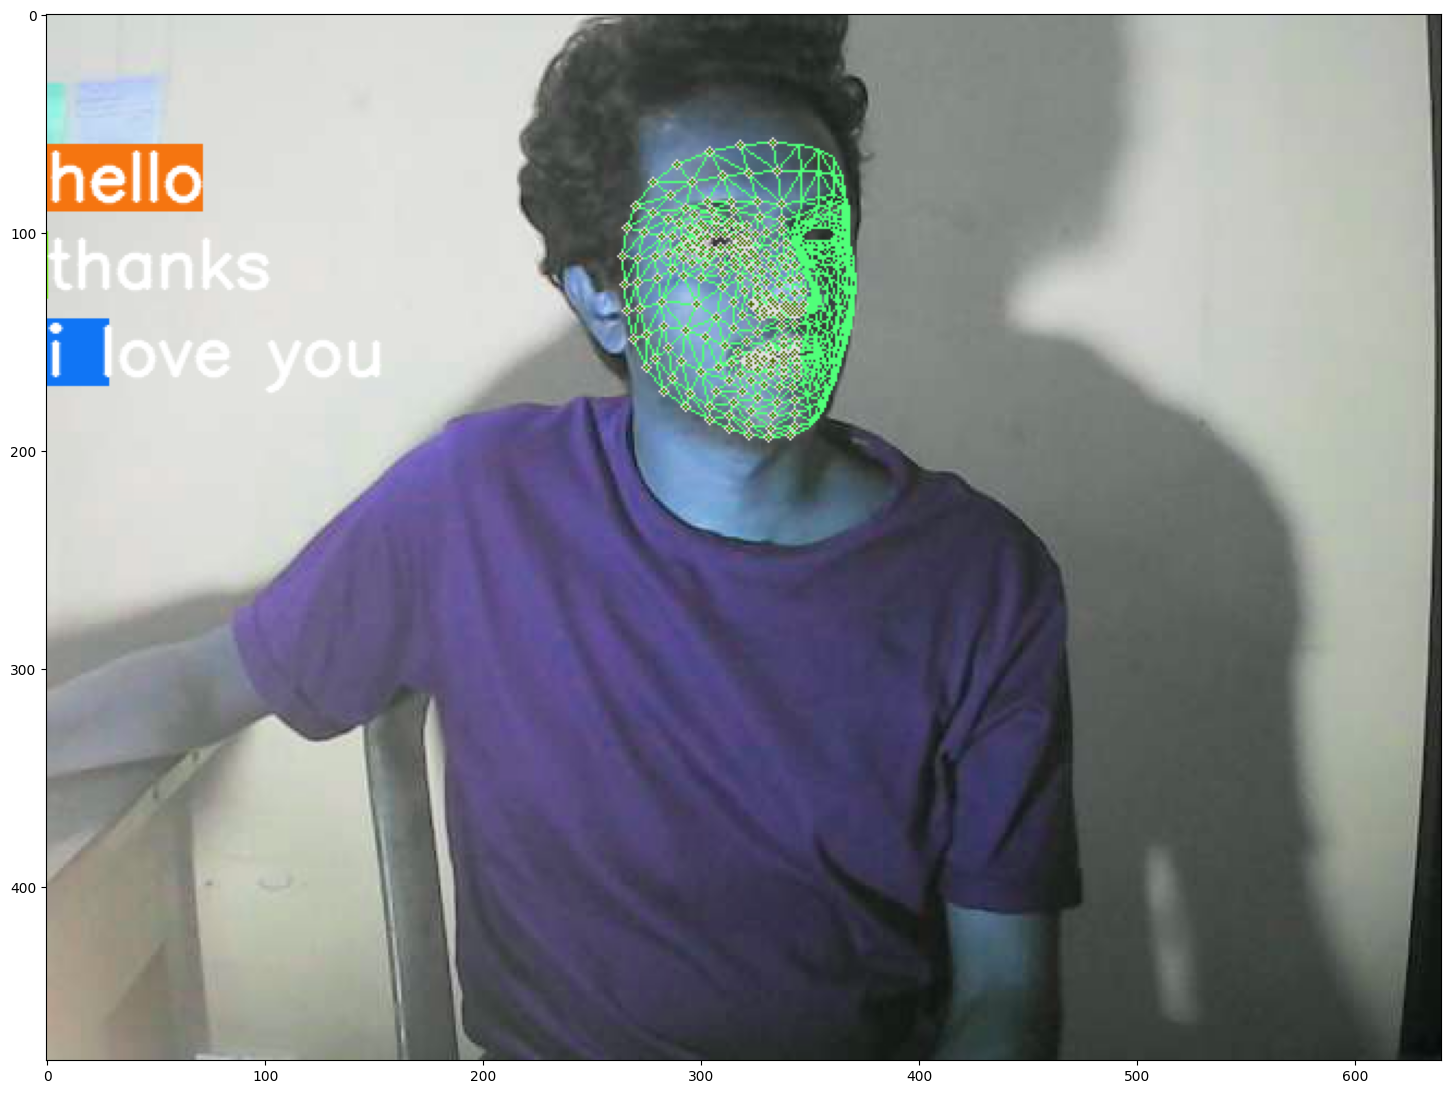

In [577]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [ ]:
#new detection varibales
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
#Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic: #initial confidence and tracking confidence
    while cap.isOpened():#doble cheaking accessing the webcam
    
        #Read feed
        ret, frame = cap.read() #retun value and frame
    
        #Make detection 
        image,results= mediapipe_detection(frame,holistic)#model = holistic
        print(results)

        #Draw landmarks
        draw_styled_landmarks(image,results)

        #prediction logic
        keypoints = extract_keypoints(results)
        #sequence.insert(0,keypoints)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])

        #Viz logic 
        #if np.unique(predictions[-10:]) == np.argmax(res):
        if res[np.argmax(res)] > threshold:
            #action append only if it is diffrent from the last 
            if len(sentence) > 0:#sentence alredy stablish
                if actions[np.argmax(res)] != sentence[-1]:#current cation =! last sentence in the string 
                    sentence.append(actions[np.argmax(res)])#append current detetcion action to sentence array
            else:#append initial action
                sentence.append(actions[np.argmax(res)])
        if len(sentence) >5: 
            sentence = sentence[-5:]

        #viz probabilities
        image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image,(0,0),(640,40),(245,117,16),-1)
        cv2.putText(image, ' '.join(sentence),(3,30),
                   cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        
        #show to screen
        cv2.imshow('OpenCV Feed',image)
    
        #break
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()#realse web cam 
    cv2.destroyAllWindows()# beak the frame

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [590]:
cap.release()
cv2.destroyAllWindows()